In [1]:
import tensorflow as tf
import sklearn

In [2]:
import sys

In [3]:
sys.path.insert(0, "/Users/spx8sk/work/git/landscapeviz")

In [4]:
import landscapeviz

In [6]:
import sklearn.datasets

In [8]:
seed=1234

In [9]:
# 1. define model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model.compile("sgd", loss="sparse_categorical_crossentropy", metrics=['sparse_categorical_accuracy', 'categorical_hinge'])

# 2. get data
data = sklearn.datasets.load_iris()
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(data["data"], data["target"], test_size=0.25, random_state=seed)

scaler_x = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,+1)).fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)

# 3. train model
model.fit(X_train, y_train, batch_size=32, epochs=60, verbose=0)

In [10]:
# 4. build mesh and plot
landscapeviz.build_mesh(model, (X_train, y_train), grid_length=40, verbose=0)

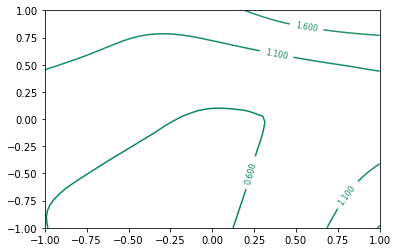

In [11]:
landscapeviz.plot_contour(key="sparse_categorical_crossentropy")

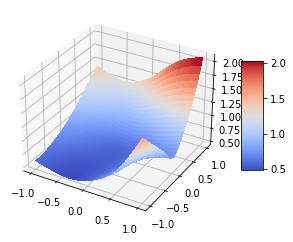

In [12]:
landscapeviz.plot_3d(key="sparse_categorical_crossentropy")